In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from tensorflow.keras.optimizers import Adam

tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import pandas as pd
from scipy import sparse
import re
import pickle
import os
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
from keras import backend as K
from tensorflow.keras.utils import to_categorical
filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = np.load('/content/drive/My Drive/test_colab/dataset_1_char_45000_15000.npy')
data

array([[  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       ...,
       [  1., 104., 116., ...,   0.,   0.,   0.],
       [  1., 104., 116., ..., 117., 115., 116.],
       [  1., 104., 116., ...,   0.,   0.,   0.]])

In [4]:
data.shape

(60000, 101)

In [0]:
x = np.delete(data, 0, axis=1)

In [6]:
x.shape

(60000, 100)

In [0]:
y = [row[0] for row in data]

In [8]:
y = np.asarray(y)
y.shape

(60000,)

In [9]:
X_train, X_test, Y_train0, Y_test0 = train_test_split(x, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, Y_train0.shape, Y_test0.shape

((48000, 100), (12000, 100), (48000,), (12000,))

In [10]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train0, 2)
Y_test = to_categorical(Y_test0, 2)
Y_train.shape

(48000, 2)

In [0]:
def model(model_nm, x_train, x_test, y_train, y_test):
  model = model_nm().fit(x_train, y_train)

  y_test_pred = model.predict(x_test)
  print(classification_report(y_test, y_test_pred, target_names=['class 0', 'class 1']))
  
  history_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')

  return print('recall_validation :', history_recall)
         

In [17]:
model(LogisticRegression, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.90      0.96      0.92      8953
     class 1       0.84      0.68      0.75      3047

    accuracy                           0.88     12000
   macro avg       0.87      0.82      0.84     12000
weighted avg       0.88      0.88      0.88     12000

recall_validation : [0.65719064 0.659699   0.6722408  0.68284519 0.66610879 0.68451883
 0.69121339 0.64769874 0.68786611 0.66108787]


In [18]:
model(MultinomialNB, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.84      0.90      0.87      8953
     class 1       0.63      0.49      0.55      3047

    accuracy                           0.80     12000
   macro avg       0.73      0.69      0.71     12000
weighted avg       0.79      0.80      0.79     12000

recall_validation : [0.49080268 0.47157191 0.48327759 0.51297071 0.48368201 0.50627615
 0.49623431 0.47782427 0.48786611 0.47782427]


In [19]:
model(DecisionTreeClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93      8953
     class 1       0.80      0.81      0.80      3047

    accuracy                           0.90     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.90      0.90      0.90     12000

recall_validation : [0.80434783 0.79598662 0.79264214 0.81757322 0.77824268 0.79665272
 0.80167364 0.78577406 0.80753138 0.8041841 ]


In [20]:
model(RandomForestClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.93      0.98      0.95      8953
     class 1       0.92      0.80      0.85      3047

    accuracy                           0.93     12000
   macro avg       0.93      0.89      0.90     12000
weighted avg       0.93      0.93      0.93     12000

recall_validation : [0.81020067 0.80100334 0.80518395 0.80920502 0.79497908 0.80920502
 0.81422594 0.78661088 0.81841004 0.78661088]


In [21]:
model(GradientBoostingClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      8953
     class 1       0.88      0.73      0.80      3047

    accuracy                           0.91     12000
   macro avg       0.90      0.85      0.87     12000
weighted avg       0.91      0.91      0.90     12000

recall_validation : [0.71989967 0.71488294 0.72575251 0.73138075 0.71046025 0.74560669
 0.74309623 0.69456067 0.73389121 0.70711297]


In [22]:
model(xgboost.XGBClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      8953
     class 1       0.89      0.71      0.79      3047

    accuracy                           0.91     12000
   macro avg       0.90      0.84      0.87     12000
weighted avg       0.90      0.91      0.90     12000

recall_validation : [0.69397993 0.68896321 0.7048495  0.71799163 0.69707113 0.72803347
 0.72133891 0.67447699 0.72301255 0.69623431]


In [23]:
model(SVC, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.89      0.97      0.93      8953
     class 1       0.88      0.64      0.74      3047

    accuracy                           0.89     12000
   macro avg       0.88      0.81      0.84     12000
weighted avg       0.89      0.89      0.88     12000

recall_validation : [0.62458194 0.61371237 0.62541806 0.64686192 0.62594142 0.64686192
 0.64351464 0.62677824 0.64016736 0.6251046 ]


In [31]:
## MLP
mlp_model = Sequential()
mlp_model.add(Dense(20, activation='relu', input_dim=100))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(2, activation='softmax'))
mlp_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
mlp_model.fit(X_train, Y_train, epochs=20, batch_size=512)
y_pred_model = mlp_model.predict(X_test.astype("float"))
y_pred = np.where(y_pred_model > 0.5, 1, 0)
print(classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/sample - loss: 6.1199 - categorical_accuracy: 0.7570
Epoch 2/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.7877 - categorical_accuracy: 0.7844
Epoch 3/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.5846 - categorical_accuracy: 0.7910
Epoch 4/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.5425 - categorical_accuracy: 0.7919
Epoch 5/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4851 - categorical_accuracy: 0.7938
Epoch 6/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4623 - categorical_accuracy: 0.7941
Epoch 7/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.5008 - categorical_accuracy: 0.7919
Epoch 8/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4788 - categorical_accuracy: 0.7966
Epoch 9/20
48000/48000 [========

In [0]:
# model.fit(X_train, Y_train, epochs=20, batch_size=512)
# score = model.evaluate(X_test, Y_test, batch_size=512)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [0]:
# y_pred_model = model.predict(X_test.astype("float"))
# y_pred = np.where(y_pred_model > 0.5, 1, 0)
# print(classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

In [0]:
def func1():
  model = Sequential()
  model.add(Dense(20, activation='relu', input_dim=100))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  
  return model

In [0]:
neural_network = KerasClassifier(build_fn=func1, epochs=10, batch_size=10, verbose=0)
neural_network
recall_mlp = cross_val_score(neural_network, X_train, Y_train0, cv=10, scoring='recall')


In [37]:
recall_mlp

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
recall = pd.read_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

In [0]:
recall

,LogisticRegression,Multinomial Naive Bayes,Decision tree,Random Forest,Gradient Boosting,XGBooster,SVC
0,0.604385,0.748332,0.527169,0.865586,0.768351,0.657769,0.656816
1,0.608198,0.752145,0.536702,0.838894,0.761678,0.684461,0.586273
2,0.556721,0.755005,0.542421,0.846520,0.759771,0.678742,0.606292
3,0.610105,0.737846,0.503337,0.839847,0.771211,0.665396,0.692088
4,0.656816,0.749285,0.559581,0.867493,0.778837,0.697807,0.521449
5,0.625357,0.746425,0.534795,0.857960,0.785510,0.689228,0.641563
6,0.603432,0.743565,0.516683,0.860820,0.776930,0.681602,0.428027
7,0.606292,0.739752,0.486177,0.838894,0.750238,0.667302,0.432793
8,0.586273,0.765491,0.562440,0.852240,0.770257,0.662536,0.359390
9,0.629171,0.750238,0.528122,0.875119,0.781697,0.689228,0.563394


In [0]:
recall.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
recall_mlp = pd.DataFrame({'MLP' : recall_mlp})

In [0]:
df = pd.concat([recall, recall_mlp], axis=1)

In [0]:
df

,LogisticRegression,Multinomial Naive Bayes,Decision tree,Random Forest,Gradient Boosting,XGBooster,SVC,MLP
0,0.604385,0.748332,0.527169,0.865586,0.768351,0.657769,0.656816,0.604459
1,0.608198,0.752145,0.536702,0.838894,0.761678,0.684461,0.586273,0.656040
2,0.556721,0.755005,0.542421,0.846520,0.759771,0.678742,0.606292,0.690517
3,0.610105,0.737846,0.503337,0.839847,0.771211,0.665396,0.692088,0.572720
4,0.656816,0.749285,0.559581,0.867493,0.778837,0.697807,0.521449,0.476071
5,0.625357,0.746425,0.534795,0.857960,0.785510,0.689228,0.641563,0.616071
6,0.603432,0.743565,0.516683,0.860820,0.776930,0.681602,0.428027,0.574539
7,0.606292,0.739752,0.486177,0.838894,0.750238,0.667302,0.432793,0.460000
8,0.586273,0.765491,0.562440,0.852240,0.770257,0.662536,0.359390,0.400636
9,0.629171,0.750238,0.528122,0.875119,0.781697,0.689228,0.563394,0.580992


In [0]:
df.to_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

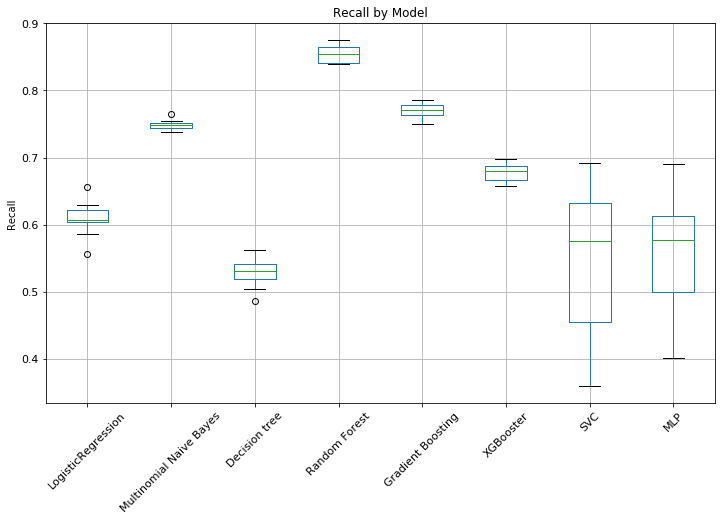

In [0]:
## boxplot
plt.figure(figsize=(12, 7))
df.boxplot(column= ['LogisticRegression', 'Multinomial Naive Bayes', 'Decision tree', 'Random Forest', 'Gradient Boosting', 'XGBooster', 'SVC', 'MLP']) 
plt.xticks(size = 11, rotation=45)
plt.yticks(size = 11)
plt.title('Recall by Model')
plt.ylabel("Recall")
plt.show()